In [1]:
#load modules
import sys
sys.path.append('../')
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import PSTHM
from tqdm.notebook import tqdm
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.patheffects as mpe
import torch
from China_RSL import gp_kernel_decomposition, load_and_plot_budget
import xarray as xr
#set plotting style
%matplotlib inline
font = {'weight':'normal',
       'size':20}

matplotlib.rc('font',**font)
matplotlib.rcParams['figure.figsize'] = (12, 6)
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["font.family"] = "Helvetica"


### Generate Holocene sea-level budget for each city (Figure 2)

Enter city + province name in Fiugre 2 in main text below to load and plot the sea-level budget, for example, Fuzhou Fujian. Available city and provinces name are given in Figure 2 in main text.

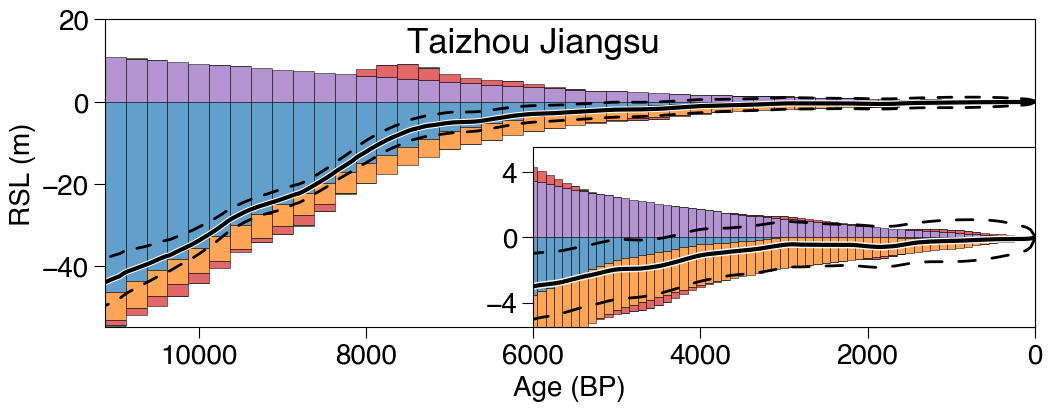

In [5]:
load_and_plot_budget('Taizhou Jiangsu')

### Generate regional non-linear kernel induced relative sea-level variation across different time scales (Figure 3)

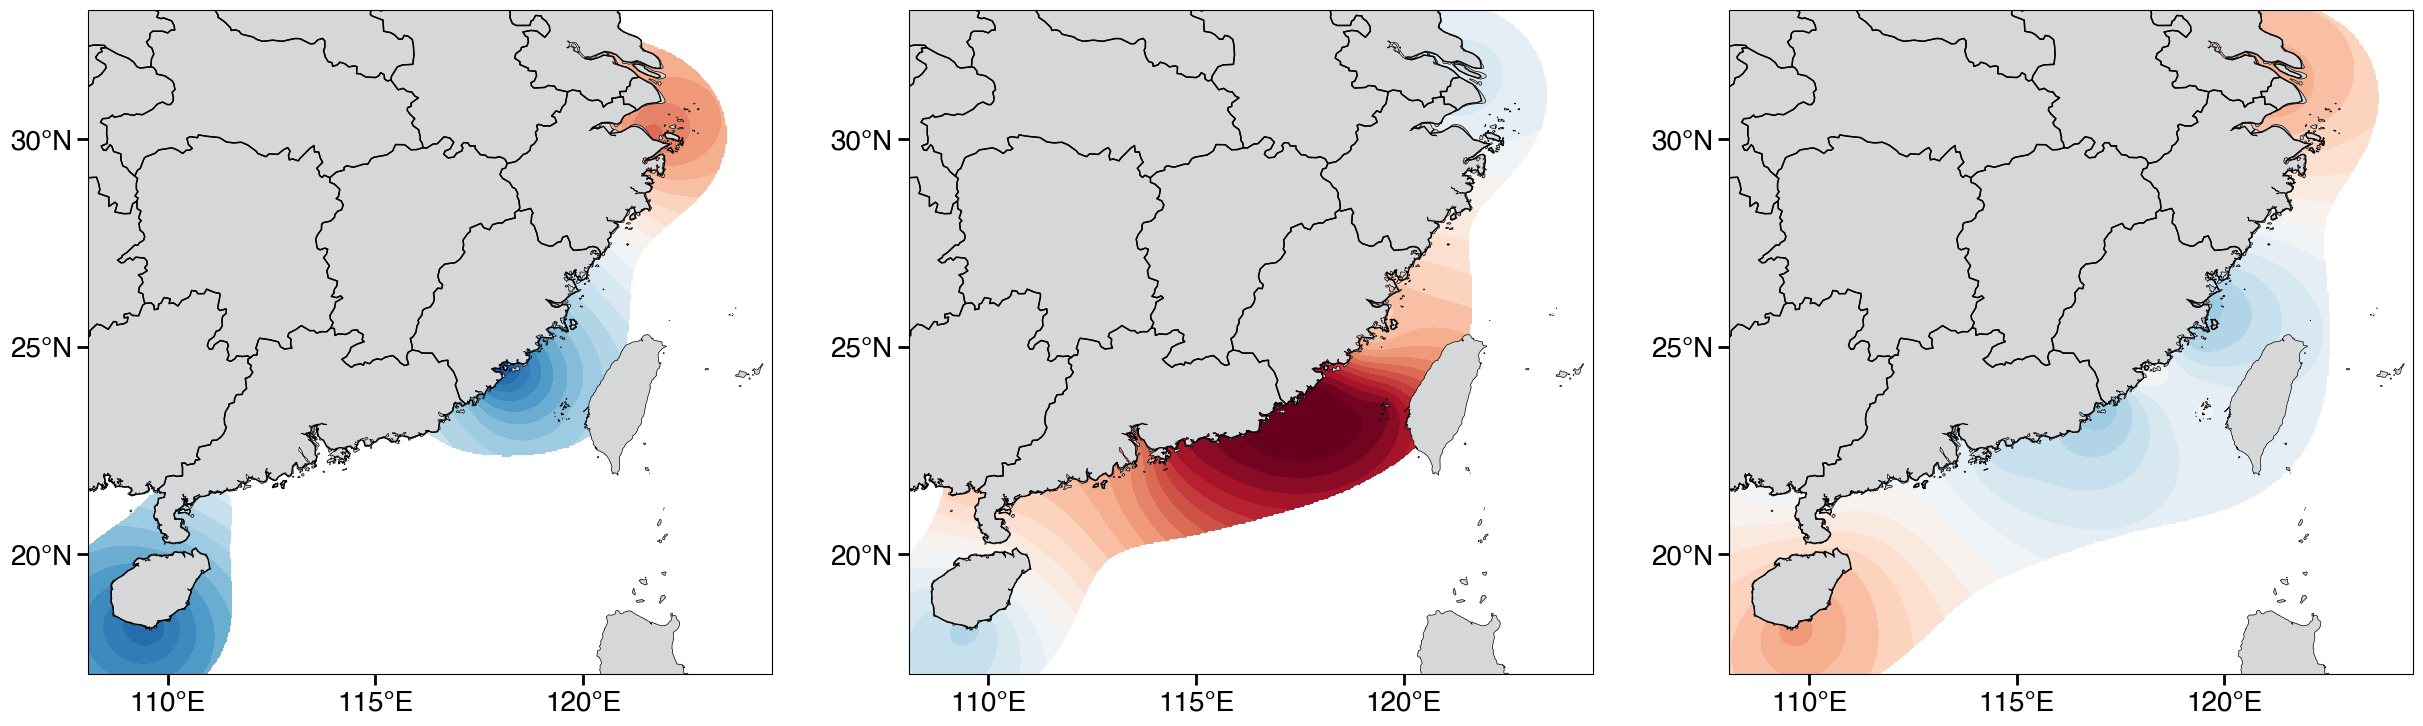

In [22]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

# Load the dataset
ds = xr.open_dataset("../data/regional_nl_contour_data.nc")

# Extract data for plotting
# First subplot (131)
grid_x1 = ds.grid_lon.values
grid_y1 = ds.grid_lat.values
grid_y1,grid_x1  = np.meshgrid(grid_y1, grid_x1)
grid_z1 = ds.grid_z_1.values
grid_std1 = ds.grid_std_1.values
masked_grid_z1 = np.ma.masked_where(ds.masked_grid_z_1_mask.values, ds.masked_grid_z_1.values)

# Second subplot (132)
grid_x2 = ds.grid_lon.values
grid_y2 = ds.grid_lat.values
grid_y2,grid_x2  = np.meshgrid(grid_y2, grid_x2)
grid_z2 = ds.grid_z_2.values
grid_std2 = ds.grid_std_2.values
masked_grid_z2 = np.ma.masked_where(ds.masked_grid_z_2_mask.values, ds.masked_grid_z_2.values)

# Third subplot (133)
grid_x3 = ds.grid_lon.values
grid_y3 = ds.grid_lat.values
grid_y3,grid_x3  = np.meshgrid(grid_y3, grid_x3)
grid_z3 = ds.grid_z_3.values
grid_std3 = ds.grid_std_3.values
masked_grid_z3 = np.ma.masked_where(ds.masked_grid_z_3_mask.values, ds.masked_grid_z_3.values)

# Region bounds
min_rsl_lon = ds.min_rsl_lon.values
max_rsl_lon = ds.max_rsl_lon.values
min_rsl_lat = ds.min_rsl_lat.values
max_rsl_lat = ds.max_rsl_lat.values

# Create the plot
plt.figure(figsize=(30, 10))

# Subplot 131
ax2 = plt.subplot(131, projection=ccrs.PlateCarree())
ax2.add_feature(cfeature.LAND.with_scale('10m'), edgecolor='black', zorder=0, facecolor='#d6d7d9', linewidth=0.5)
ax2.add_feature(cfeature.STATES, edgecolor='black', zorder=0, facecolor='none')
ax2.set_extent([min_rsl_lon-0.6, max_rsl_lon+3, min_rsl_lat-1.1, max_rsl_lat+0.5])
ax2.set_xticks([110, 115, 120], crs=ccrs.PlateCarree())
ax2.set_yticks(np.arange(20, 33, 5), crs=ccrs.PlateCarree())
ax2.xaxis.set_tick_params(width=2)
ax2.yaxis.set_tick_params(width=2)
ax2.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True))
ax2.yaxis.set_major_formatter(LatitudeFormatter())
plt.contourf(grid_x1, grid_y1, masked_grid_z1, levels=np.arange(-1.5, 1.6, 0.1), 
             cmap="RdBu_r", extend='both', zorder=-1)

# Subplot 132
ax2 = plt.subplot(132, projection=ccrs.PlateCarree())
ax2.add_feature(cfeature.LAND.with_scale('10m'), edgecolor='black', zorder=0, facecolor='#d6d7d9', linewidth=0.5)
ax2.add_feature(cfeature.STATES, edgecolor='black', zorder=0, facecolor='none')
ax2.set_extent([min_rsl_lon-0.6, max_rsl_lon+3, min_rsl_lat-1.1, max_rsl_lat+0.5])
ax2.set_xticks([110, 115, 120], crs=ccrs.PlateCarree())
ax2.set_yticks(np.arange(20, 33, 5), crs=ccrs.PlateCarree())
ax2.xaxis.set_tick_params(width=2)
ax2.yaxis.set_tick_params(width=2)
ax2.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True))
ax2.yaxis.set_major_formatter(LatitudeFormatter())
plt.contourf(grid_x2, grid_y2, masked_grid_z2, levels=np.arange(-1.5, 1.6, 0.1), 
             cmap="RdBu_r", extend='both', zorder=-1)

# Subplot 133
ax2 = plt.subplot(133, projection=ccrs.PlateCarree())
ax2.add_feature(cfeature.LAND.with_scale('10m'), edgecolor='black', zorder=0, facecolor='#d6d7d9', linewidth=0.5)
ax2.add_feature(cfeature.STATES, edgecolor='black', zorder=0, facecolor='none')
ax2.set_extent([min_rsl_lon-0.6, max_rsl_lon+3, min_rsl_lat-1.1, max_rsl_lat+0.5])
ax2.set_xticks([110, 115, 120], crs=ccrs.PlateCarree())
ax2.set_yticks(np.arange(20, 33, 5), crs=ccrs.PlateCarree())
ax2.xaxis.set_tick_params(width=2)
ax2.yaxis.set_tick_params(width=2)
ax2.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True))
ax2.yaxis.set_major_formatter(LatitudeFormatter())
plt.contourf(grid_x3, grid_y3, masked_grid_z3, levels=np.arange(-1.5, 1.6, 0.1), 
             cmap="RdBu_r", extend='both', zorder=-1)

# Save the figure
plt.show()

#### Generate temporal evolution by regional non-linear kernel 

Comparing with flood deposit data from:

Chen, C., Zheng, Y., Zheng, Z., Zong, Y., Huang, K., Rolett, B.V., Peng, H., Zhang, X., Tang, Y., Wan, Q. and Zhang, G., 2023. Holocene millennial-scale megaflood events point to ENSO-driven extreme climate changes. Science China Earth Sciences, 66(11), pp.2530-2545.

Wang, Z., Ryves, D.B., Lei, S., Nian, X., Lv, Y., Tang, L., Wang, L., Wang, J. and Chen, J., 2018. Middle Holocene marine flooding and human response in the south Yangtze coastal plain, East China. Quaternary Science Reviews, 187, pp.80-93.

He, K., Lu, H., Sun, G., Ji, X., Wang, Y., Yan, K., Zuo, X., Zhang, J., Liu, B. and Wang, N., 2021. Multi-proxy evidence of environmental change related to collapse of the Liangzhu Culture in the Yangtze Delta, China. Science China Earth Sciences, 64(6), pp.890-905.

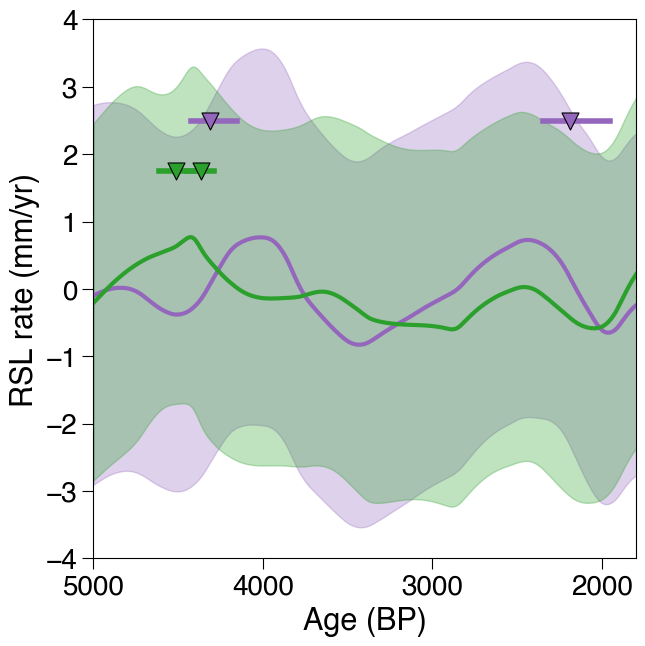

In [11]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
ds = xr.open_dataset("../data/rsl_rate_plot_data.nc")

# Extract data for plotting
# First dataset (C4)
time1 = ds.time1.values
detrend_mean1 = ds.detrend_mean1.values
rsl_rate_sd1 = ds.rsl_rate_sd1.values
scatter_x1 = ds.scatter_x1.values
scatter_y1 = ds.scatter_y1.values
flood_uncert_x = ds.flood_uncert_x.values  # Should be length 4
flood_uncert_y = ds.flood_uncert_y.values  # Should be length 4

# Second dataset (C2)
time2 = ds.time2.values
detrend_mean2 = ds.detrend_mean2.values
rsl_rate_sd2 = ds.rsl_rate_sd2.values
scatter_x2 = ds.scatter_x2.values
scatter_y2 = ds.scatter_y2.values
line1_x2 = ds.line1_x2.values
line1_y2 = ds.line1_y2.values
line2_x2 = ds.line2_x2.values
line2_y2 = ds.line2_y2.values

# Create the plot
plt.figure(figsize=(7, 7))
ax = plt.subplot(111)

# Plot first dataset (C4)
ax.plot(time1, detrend_mean1, color='C4', linewidth=3)
ax.fill_between(time1, detrend_mean1 - rsl_rate_sd1, detrend_mean1 + rsl_rate_sd1, 
                color='C4', alpha=0.3)

# Plot second dataset (C2)
ax.plot(time2, detrend_mean2, color='C2', linewidth=3)
ax.fill_between(time2, detrend_mean2 - rsl_rate_sd2, detrend_mean2 + rsl_rate_sd2, 
                color='C2', alpha=0.3)

# Scatter and uncertainty lines for C4
ax.scatter(scatter_x1, scatter_y1, marker='v', color='C4', ec='k', linewidth=0.8, 
           s=150, zorder=10)
# Plot flood uncertainty lines (assuming flood_uncert_x has 4 values)
ax.plot(flood_uncert_x[:2], flood_uncert_y[:2], linewidth=4, color='C4', zorder=9)  # First line
ax.plot(flood_uncert_x[2:], flood_uncert_y[2:], linewidth=4, color='C4', zorder=9)  # Second line

# Scatter and uncertainty lines for C2
ax.scatter(scatter_x2, scatter_y2, marker='v', color='C2', ec='k', linewidth=0.8, 
           s=150, zorder=10)
ax.plot(line1_x2, line1_y2, linewidth=4, color='C2', zorder=9)
ax.plot(line2_x2, line2_y2, linewidth=4, color='C2', zorder=9)

# Set plot limits
plt.xlim(5000, 1800)
ax.set_ylim(-4, 4)
plt.xlabel('Age (BP)')
plt.ylabel('RSL rate (mm/yr)')
# Save the figure (optional)
plt.show()

### Check the decomposed China sea-level budget at differnet time slices

You should be able to visulize sea-level budget components in the following plots regarding temporally linear kernel, regional non-linear kernel, locally non-linear kernel and gravitational rotational and deformational effect. The grid cells were based on GIA modelling grids.

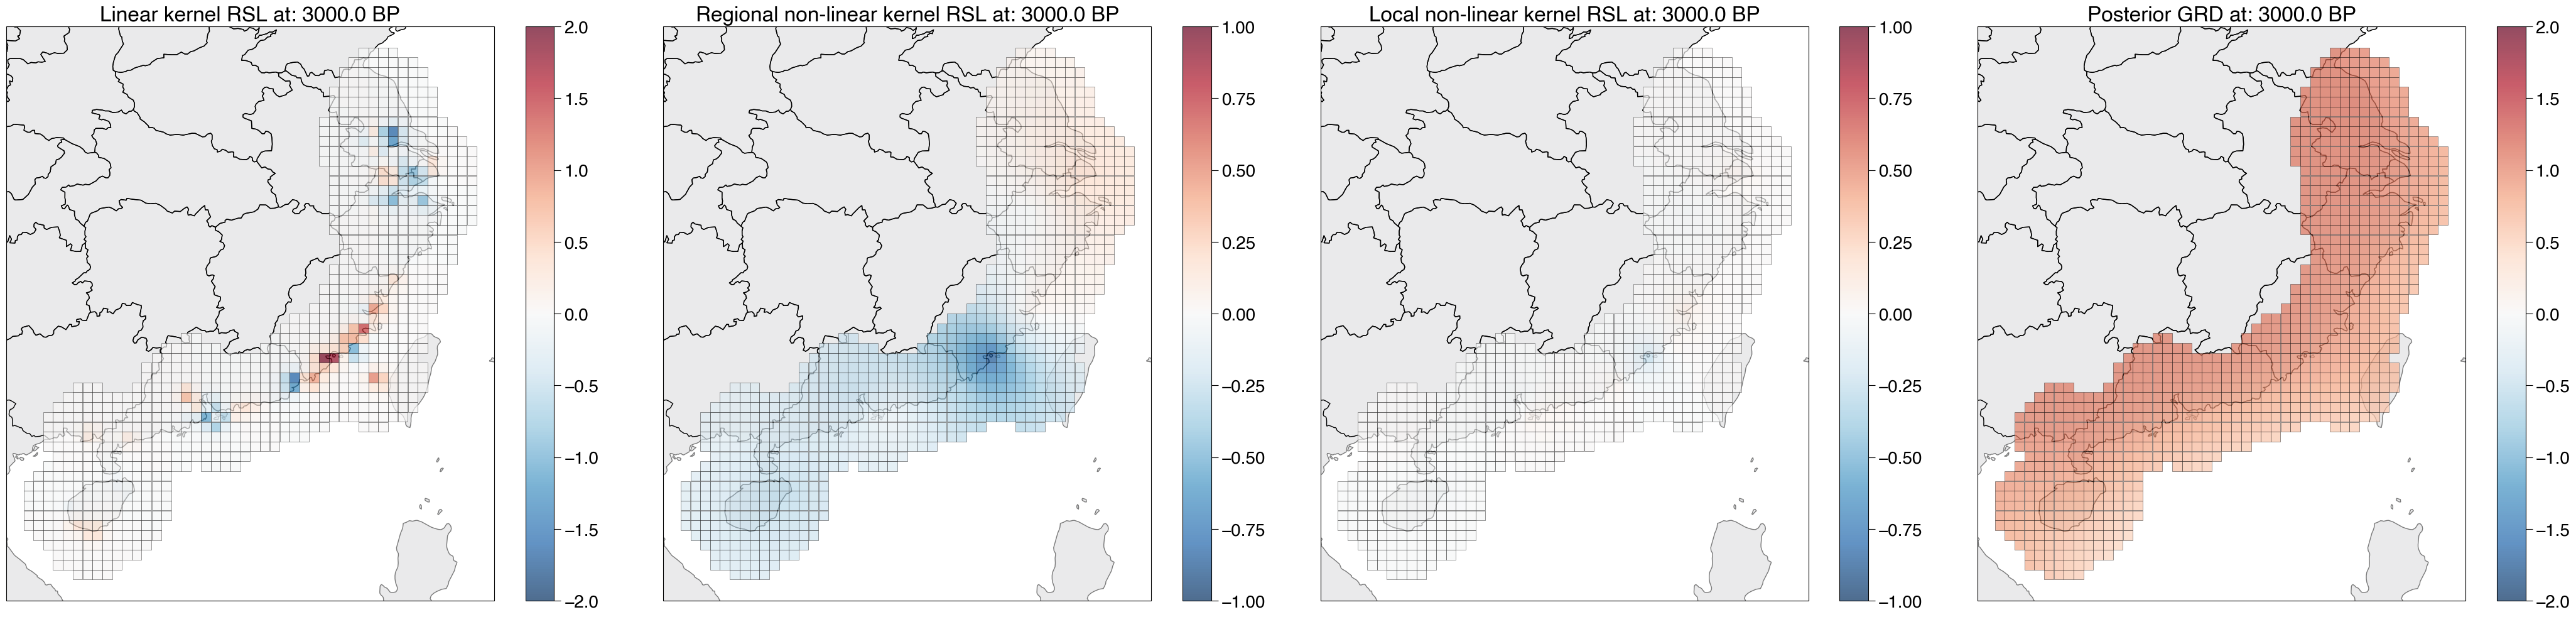

In [12]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load the dataset
ds = xr.open_dataset("../Data/gp_decomposition.nc")

# Select an arbitrary time slice (e.g., index 10 corresponds to time_index 74)
time_slice_idx = 33  # You can change this between 0 and 46 
time = ds.time.values[time_slice_idx]

# Extract data for the selected time slice
masked_regional_l_mean = ds.masked_regional_l_mean.values[time_slice_idx]
regional_nl_mean = ds.regional_nl_mean.values[time_slice_idx]
local_nl_mean = ds.local_nl_mean.values[time_slice_idx]
site_coord_lon = ds.lon.values  # Assuming lon is site_coord[:, 1]
site_coord_lat = ds.lat.values  # Assuming lat is site_coord[:, 0]

# Placeholder for post_rsl_toto_grid and ESL_post (not in NetCDF, need to be provided)
# For demonstration, I'll use dummy data; replace these with your actual data
GRD_holocene = ds.GRD_holocene.values
ESL_post = np.zeros(47)  # Replace with actual data
ESL_signal = ESL_post[time_slice_idx]  # Replace with your f_post_ESL function if available

# Create the plot
plt.figure(figsize=(42, 10))

# Subplot 141: Regional Linear (l(s,t))
ax2 = plt.subplot(141, projection=ccrs.PlateCarree())
ax2.add_feature(cfeature.LAND, edgecolor='black', zorder=0, alpha=0.5, facecolor='#d6d7d9')
ax2.add_feature(cfeature.STATES, edgecolor='black', zorder=0, facecolor='none')
plt.title('Linear kernel RSL at: {:} BP'.format(time))
plt.scatter(site_coord_lon, site_coord_lat, c=masked_regional_l_mean, marker='s', 
            facecolor='none', ec='k', s=125, linewidth=0.4, alpha=0.7, 
            cmap='RdBu_r', vmax=2, vmin=-2)
plt.colorbar(ax=ax2)

# Subplot 142: Regional Non-Linear (r(s,t) RSL)
ax2 = plt.subplot(142, projection=ccrs.PlateCarree())
ax2.add_feature(cfeature.LAND, edgecolor='black', zorder=0, alpha=0.5, facecolor='#d6d7d9')
ax2.add_feature(cfeature.STATES, edgecolor='black', zorder=0, facecolor='none')
plt.title('Regional non-linear kernel RSL at: {:} BP'.format(time))
plt.scatter(site_coord_lon, site_coord_lat, c=regional_nl_mean, marker='s', 
            facecolor='none', ec='k', s=125, linewidth=0.4, alpha=0.7, 
            cmap='RdBu_r', vmax=1, vmin=-1)
plt.colorbar(ax=ax2)

# Subplot 143: Local Non-Linear (s(s,t))
ax2 = plt.subplot(143, projection=ccrs.PlateCarree())
ax2.add_feature(cfeature.LAND, edgecolor='black', zorder=0, alpha=0.5, facecolor='#d6d7d9')
ax2.add_feature(cfeature.STATES, edgecolor='black', zorder=0, facecolor='none')
plt.title('Local non-linear kernel RSL at: {:} BP'.format(time))
plt.scatter(site_coord_lon, site_coord_lat, c=local_nl_mean, marker='s', 
            facecolor='none', ec='k', s=125, linewidth=0.4, alpha=0.7, 
            cmap='RdBu_r', vmax=1, vmin=-1)
plt.colorbar(ax=ax2)

# Subplot 144: GRD(s,t) with ESL
ax2 = plt.subplot(144, projection=ccrs.PlateCarree())
ax2.add_feature(cfeature.LAND, edgecolor='black', zorder=0, alpha=0.5, facecolor='#d6d7d9')
ax2.add_feature(cfeature.STATES, edgecolor='black', zorder=0, facecolor='none')
plt.title('Posterior GRD at: {:} BP'.format(time))
# Apply the same mask as masked_regional_nl_mean to masked_regional_l_mean (as in original)
plt.scatter(site_coord_lon, site_coord_lat, 
            c=GRD_holocene[time_slice_idx] , 
            marker='s', facecolor='none', ec='k', s=125, linewidth=0.4, alpha=0.7, 
            cmap='RdBu_r', vmax=2, vmin=-2)
plt.colorbar(ax=ax2)

plt.tight_layout()
plt.show()

### Holocene sea-level budget reconstruction (Figure 4b and S5)

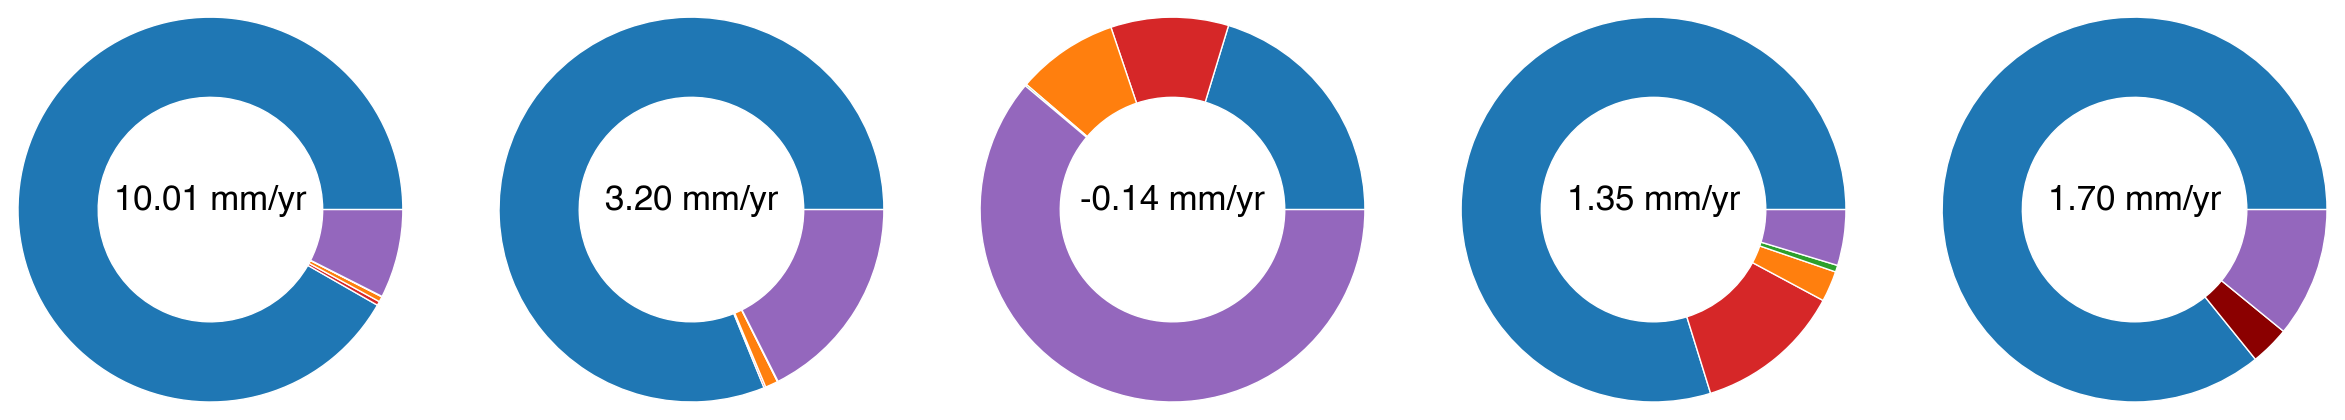

In [13]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
ds = xr.open_dataset("../data/holocene_sea_level_budget.nc")

# Extract data
early_holocene_rate = ds.early_holocene_rate.values
mid_holocene_rate = ds.mid_holocene_rate.values
late_holocene_rate = ds.late_holocene_rate.values
post_1900_rate = ds.post_1900_rate.values
post_1900_rate_2 = ds.post_1900_rate_2.values

early_holocene_pie_norm = ds.early_holocene_pie_norm.values
mid_holocene_pie_norm = ds.mid_holocene_pie_norm.values
late_holocene_pie_norm = ds.late_holocene_pie_norm.values
post_1900_pie_norm = ds.post_1900_pie_norm.values
post_1900_pie_2_norm = ds.post_1900_pie_2_norm.values

colors = ['C0', 'C3', 'C1', 'C2', 'C4']
order_index = np.array([1, 2, 0], dtype=int)

# Plot
plt.figure(figsize=(30, 12))

plt.subplot(151)
plt.pie(early_holocene_pie_norm, radius=1.2, labeldistance=0.7, colors=colors, pctdistance=10)
plt.setp(plt.gca().patches, width=0.5, edgecolor='white')
plt.margins(0, 0)
plt.text(0, 0, '{:4.2f} mm/yr'.format(early_holocene_rate), fontsize=25, ha='center')

plt.subplot(152)
plt.pie(mid_holocene_pie_norm, radius=1.2, labeldistance=0.7, colors=colors, pctdistance=10)
plt.setp(plt.gca().patches, width=0.5, edgecolor='white')
plt.margins(0, 0)
plt.text(0, 0, '{:4.2f} mm/yr'.format(mid_holocene_rate), fontsize=25, ha='center')

plt.subplot(153)
plt.pie(late_holocene_pie_norm, radius=1.2, labeldistance=0.7, colors=colors, pctdistance=10)
plt.setp(plt.gca().patches, width=0.5, edgecolor='white')
plt.margins(0, 0)
plt.text(0, 0, '{:4.2f} mm/yr'.format(late_holocene_rate), fontsize=25, ha='center')

plt.subplot(154)
plt.pie(post_1900_pie_norm, radius=1.2, labeldistance=0.7, pctdistance=10, colors=colors)
plt.setp(plt.gca().patches, width=0.5, edgecolor='white')
plt.margins(0, 0)
plt.text(0, 0, '{:4.2f} mm/yr'.format(post_1900_rate), fontsize=25, ha='center')

plt.subplot(155)
plt.pie(post_1900_pie_2_norm[order_index], radius=1.2, labeldistance=0.7, pctdistance=10, 
        colors=np.array(['C4', 'C0', 'darkred'])[order_index])
plt.setp(plt.gca().patches, width=0.5, edgecolor='white')
plt.margins(0, 0)
plt.text(0, 0, '{:4.2f} mm/yr'.format(post_1900_rate_2), fontsize=25, ha='center')

plt.show()

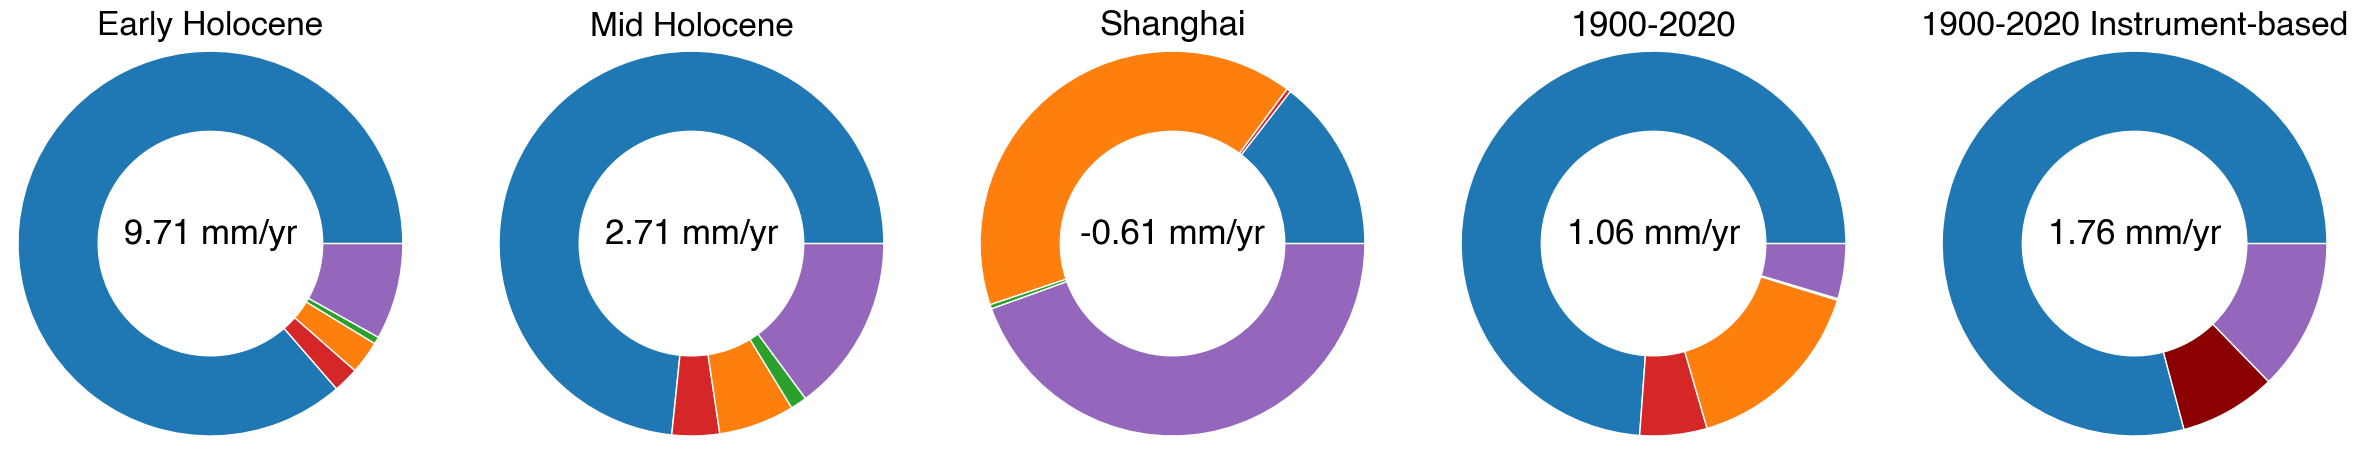

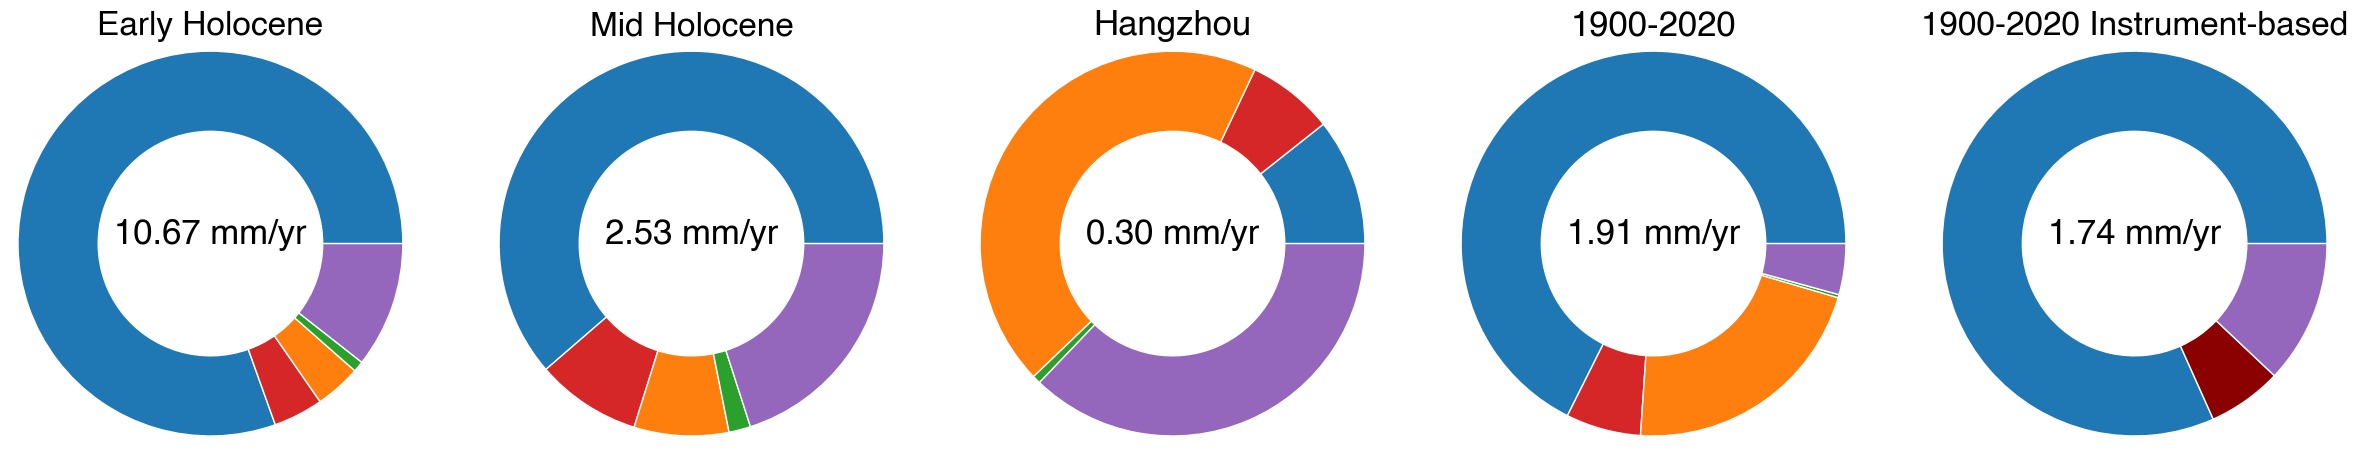

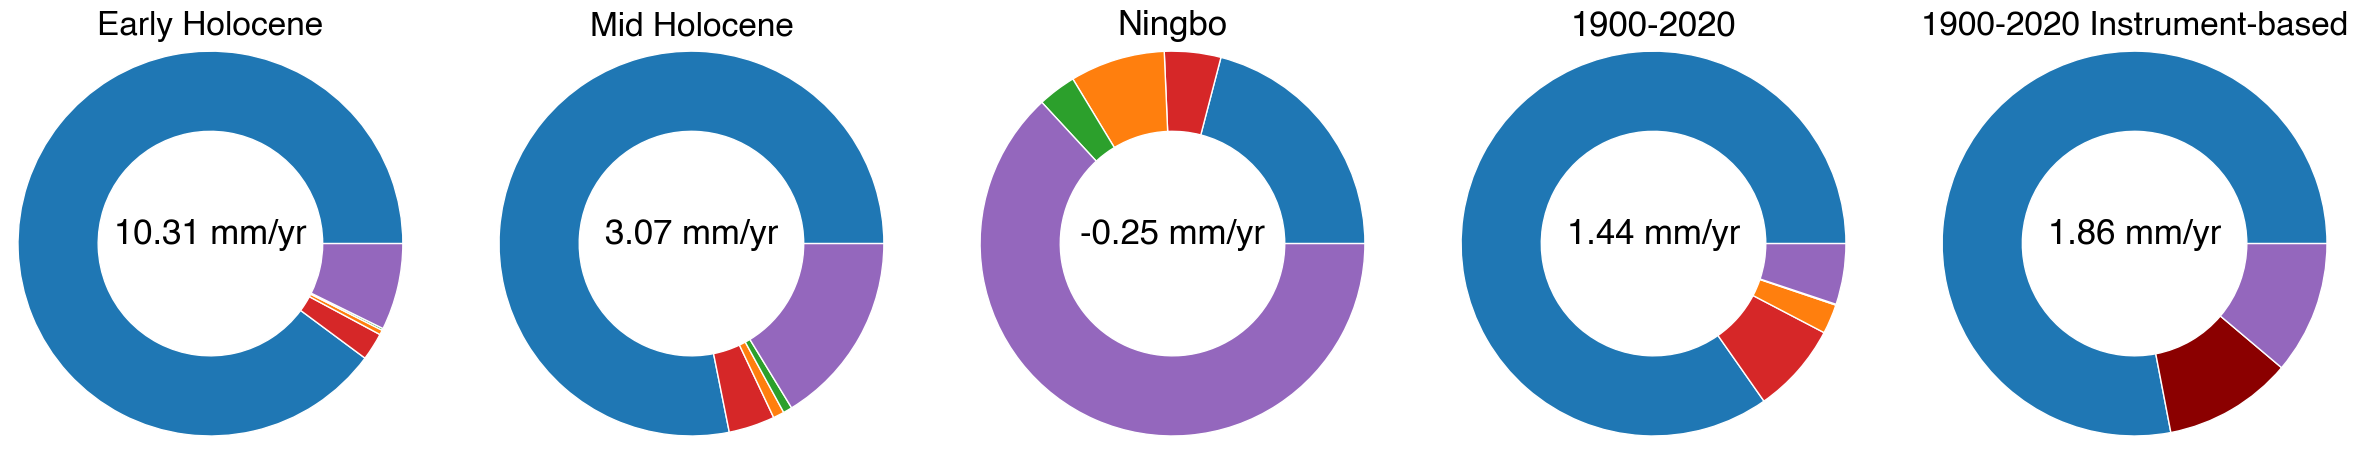

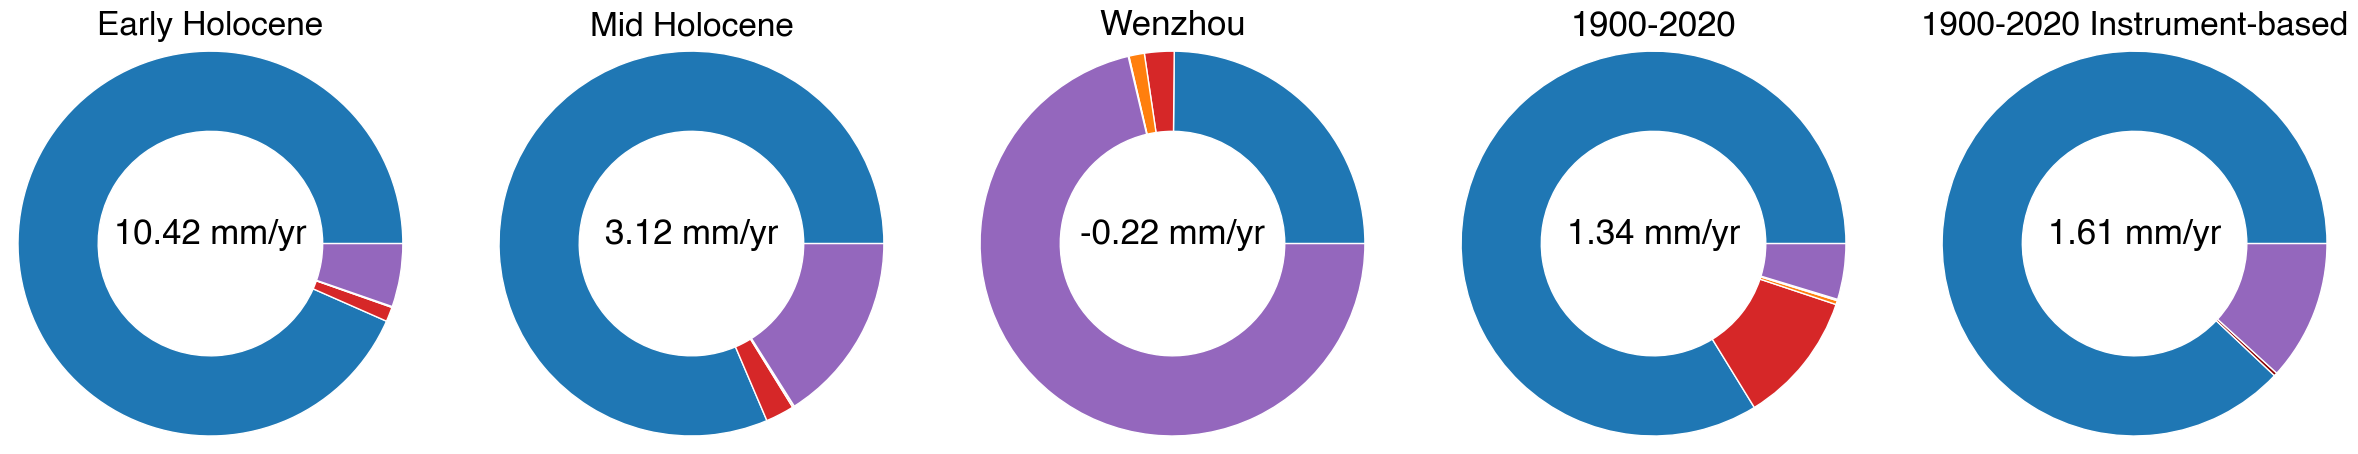

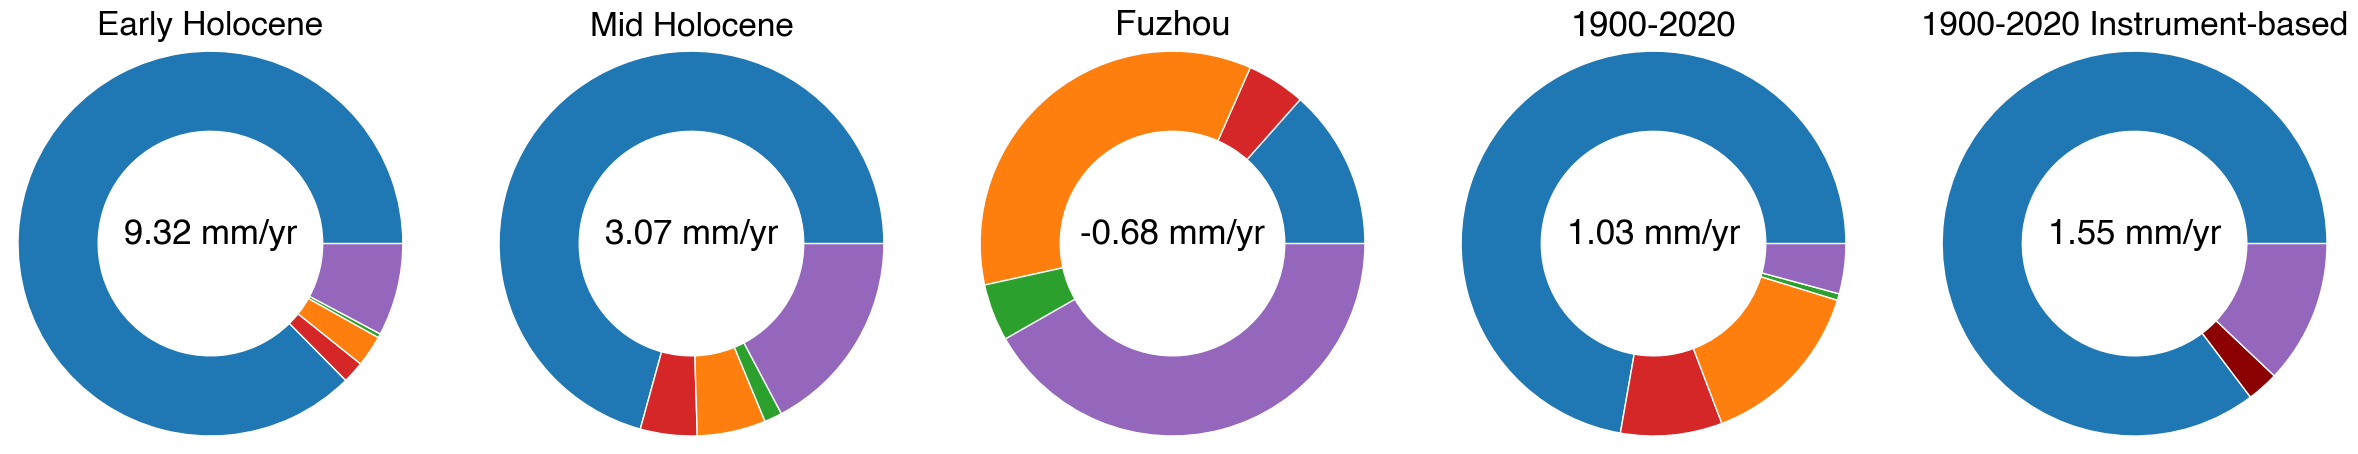

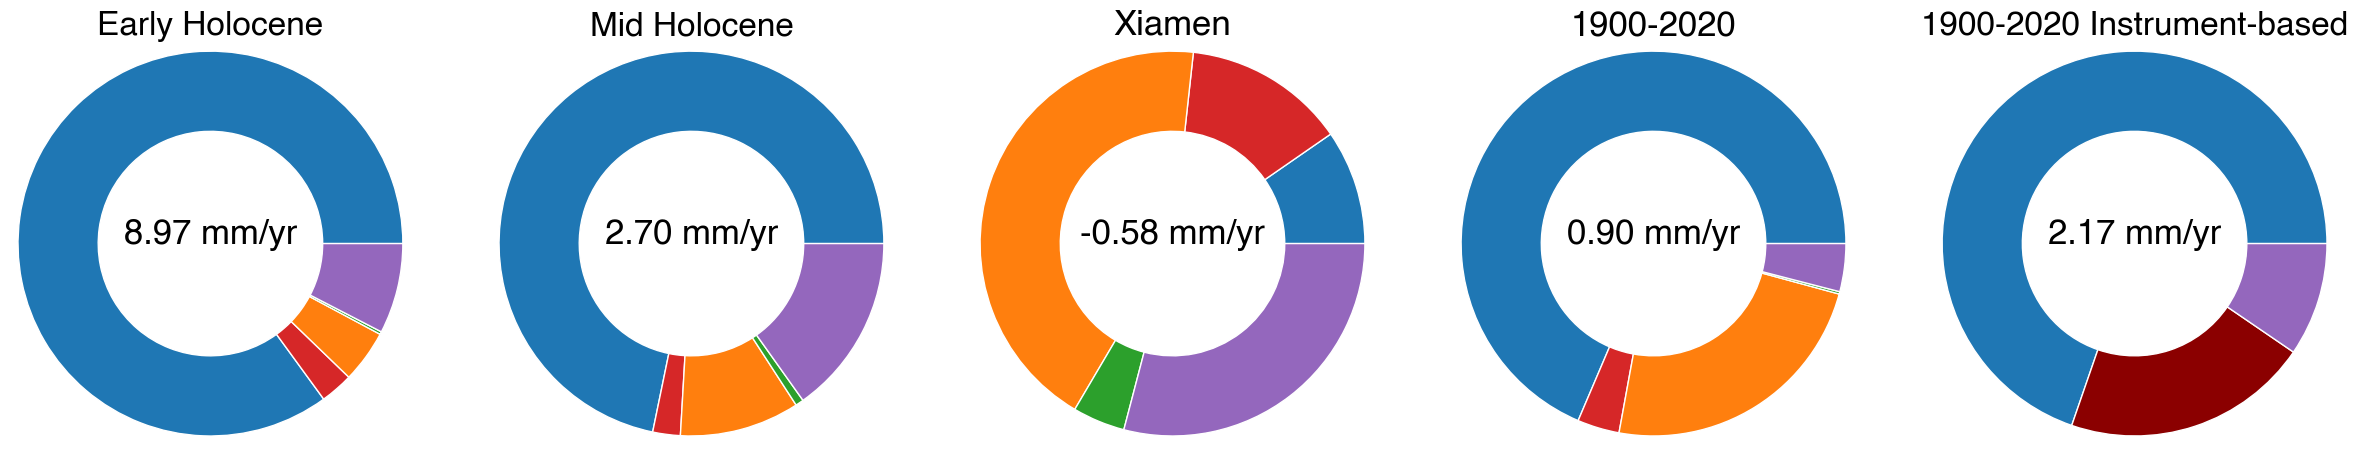

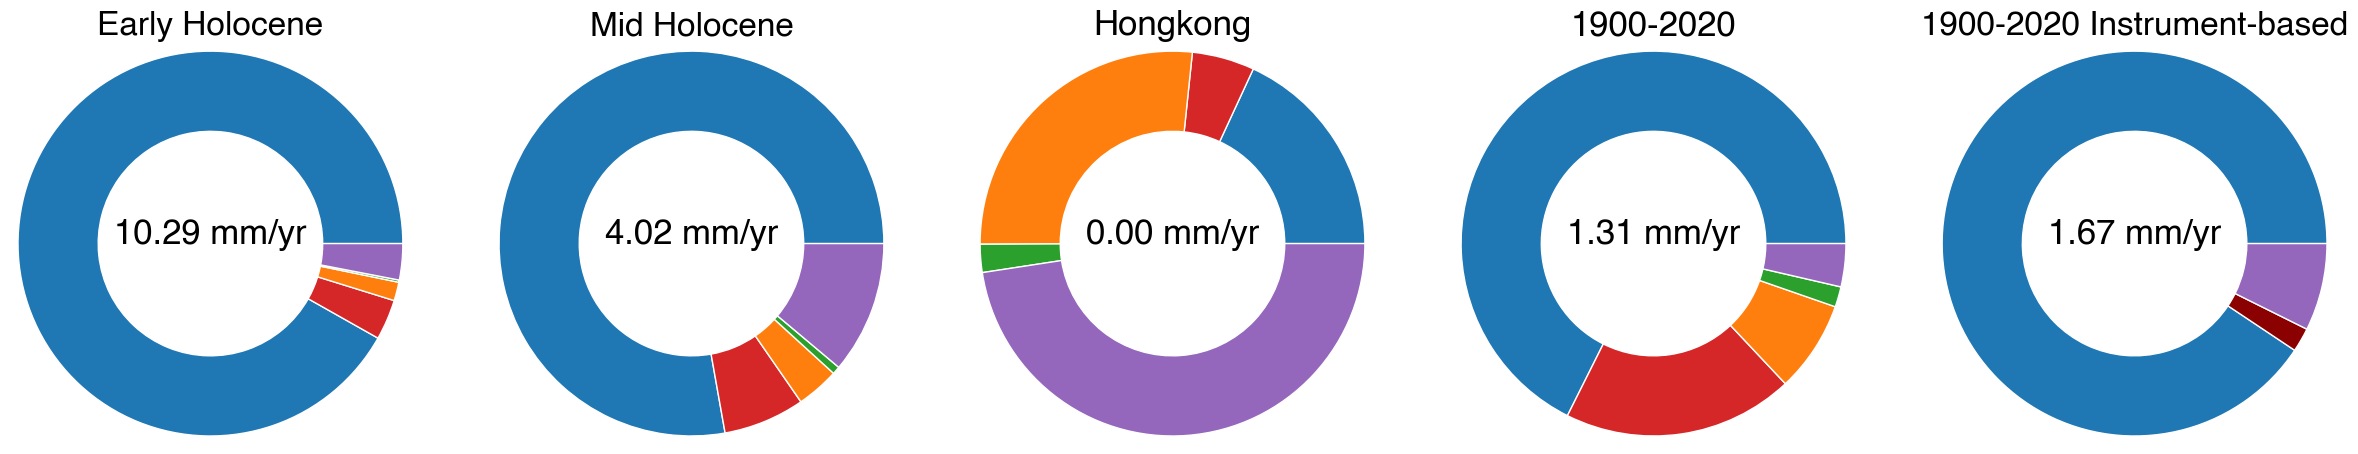

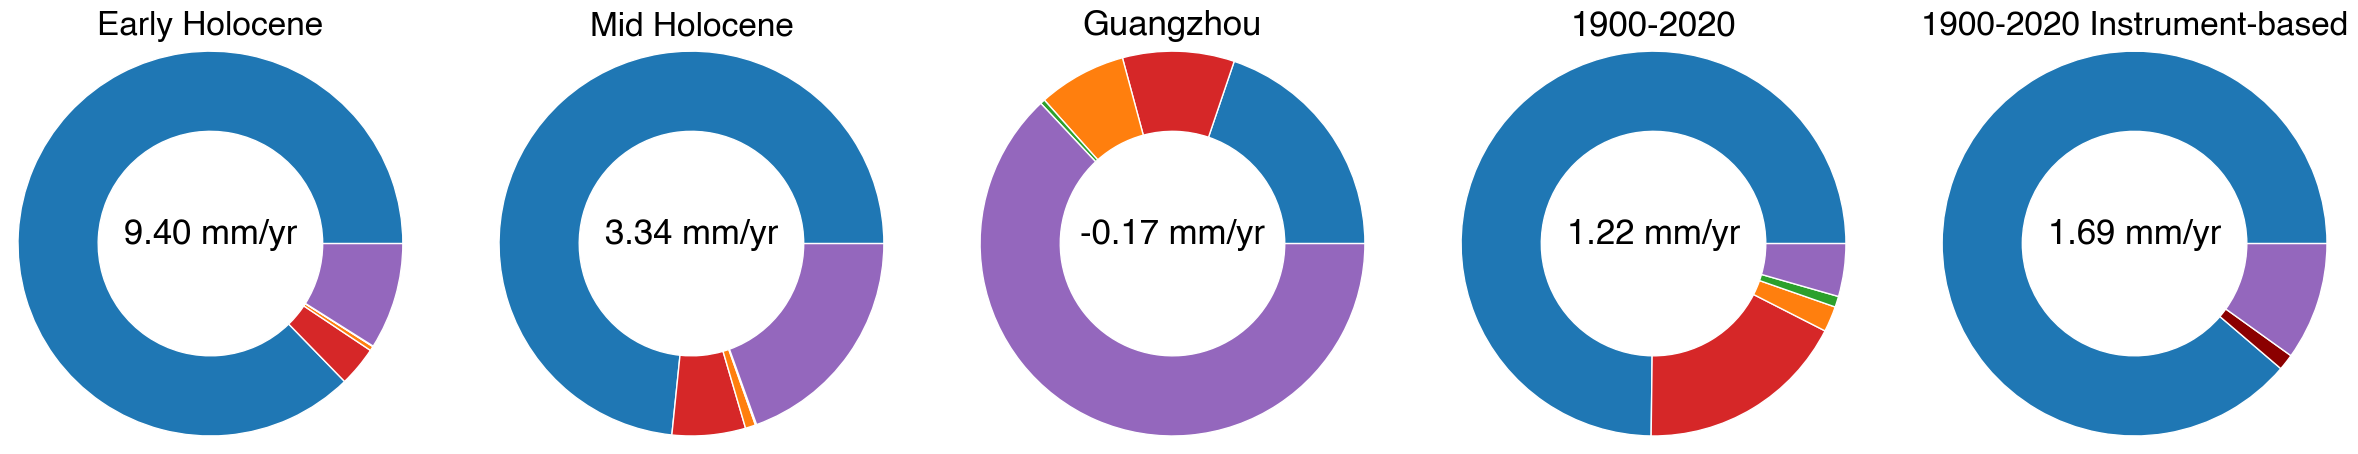

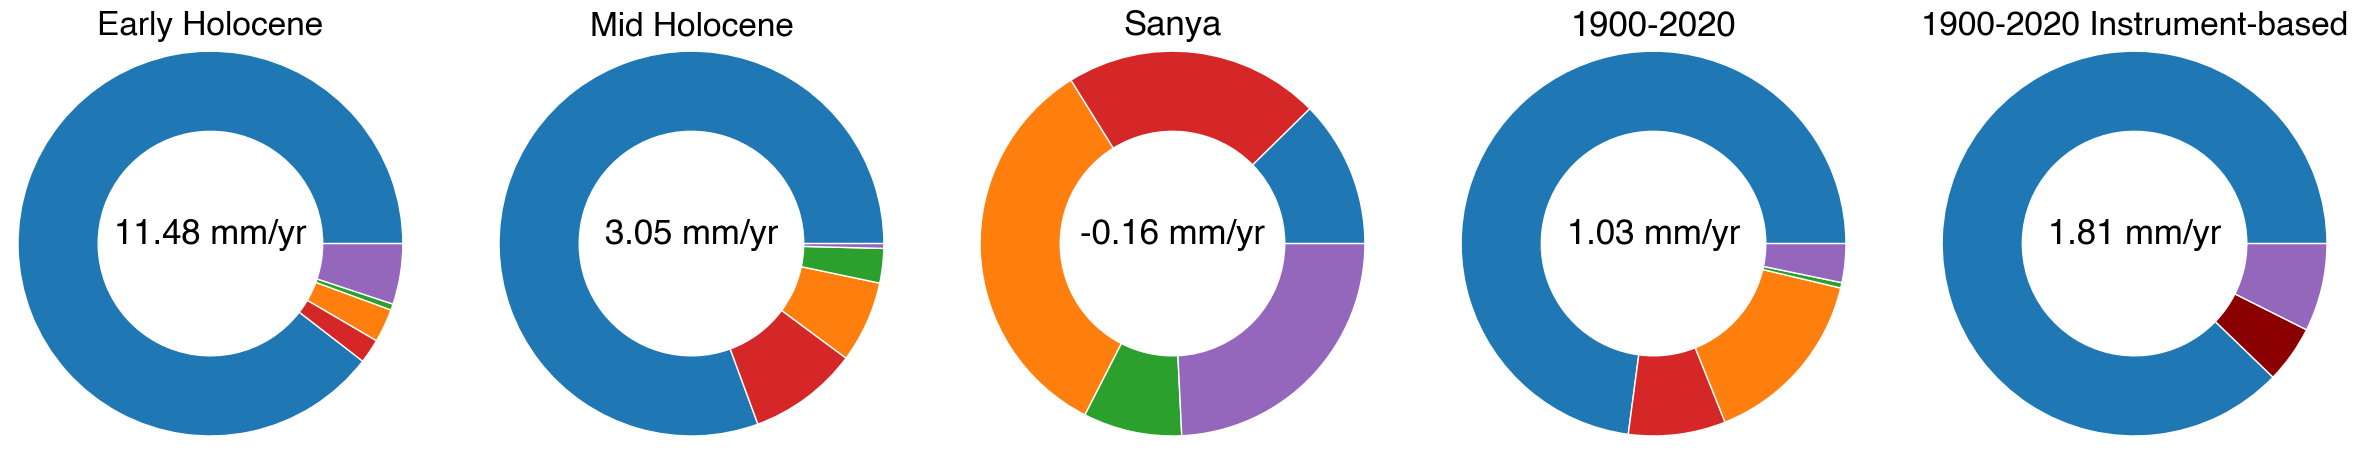

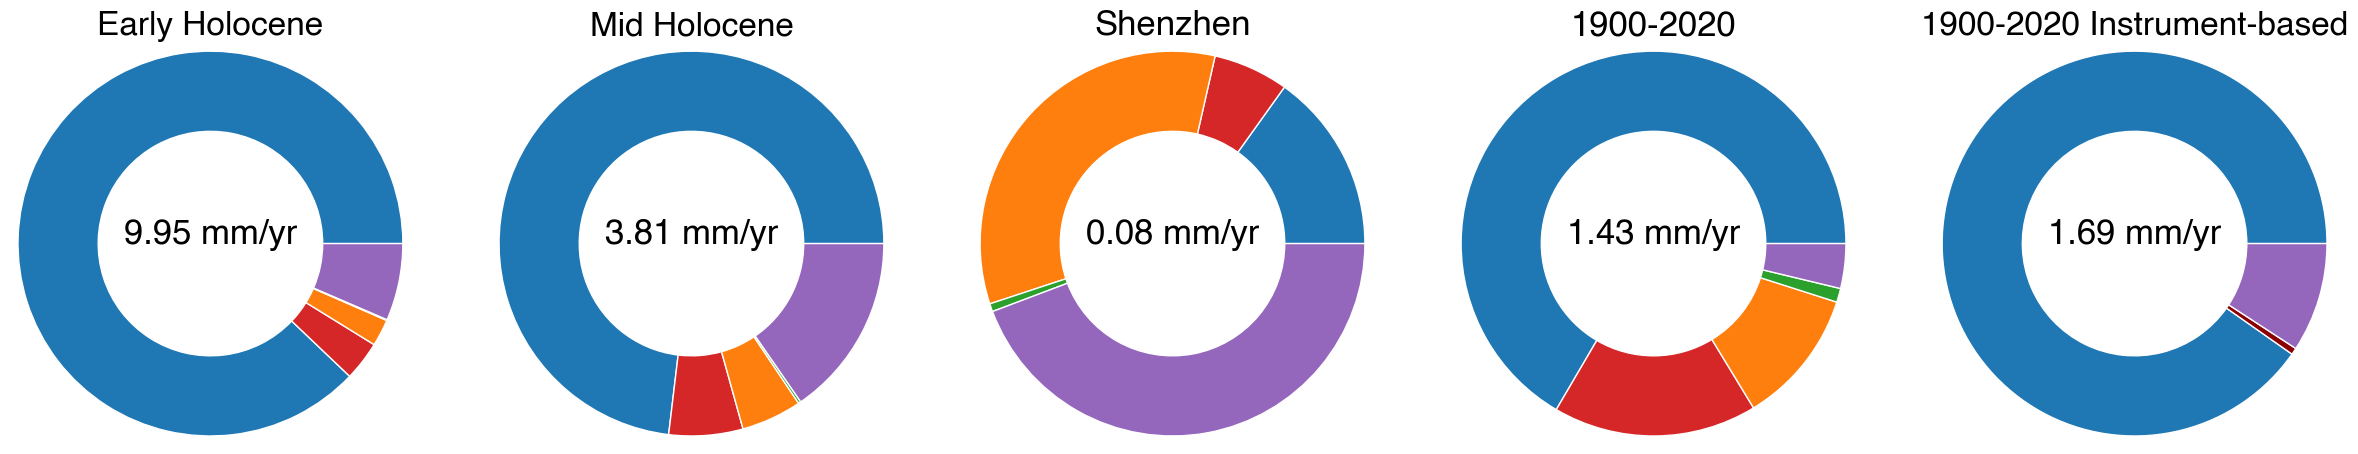

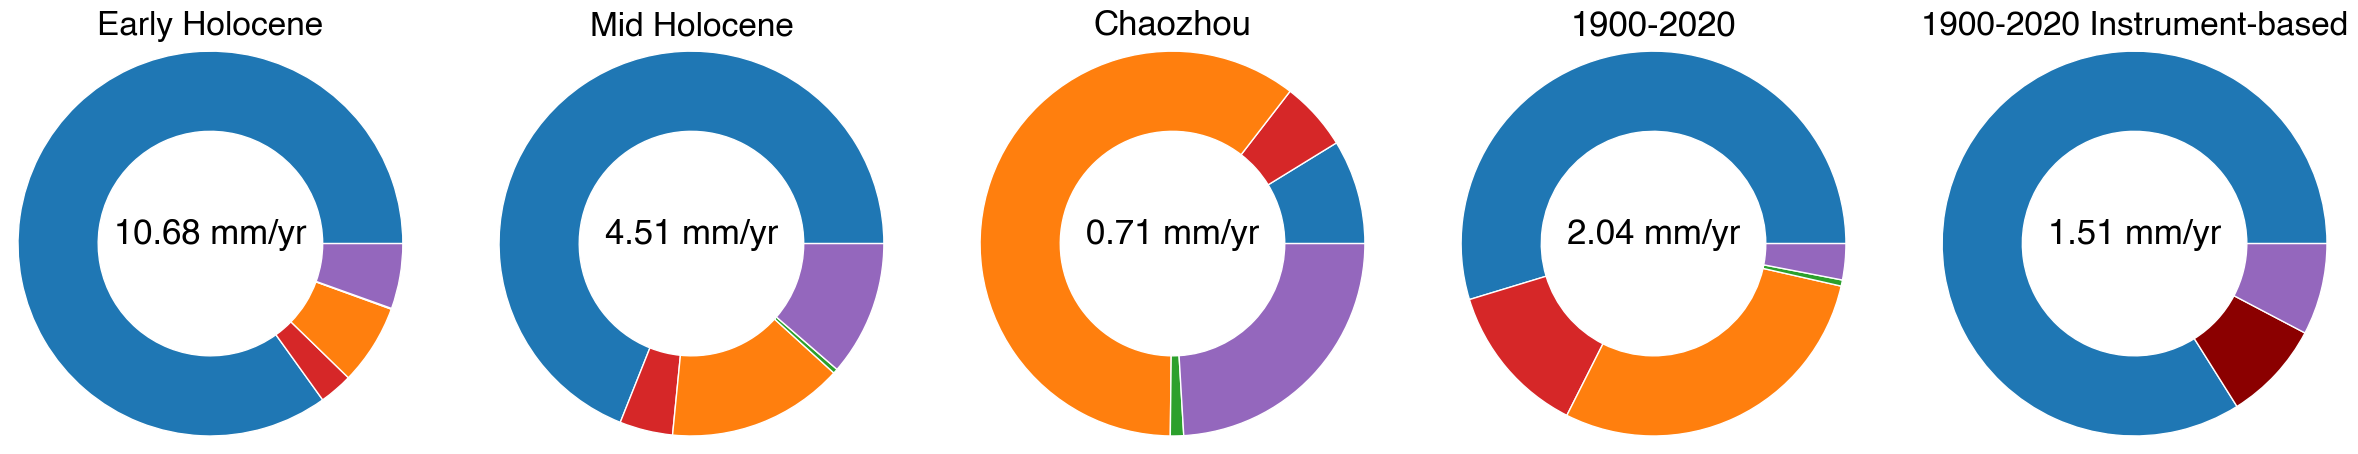

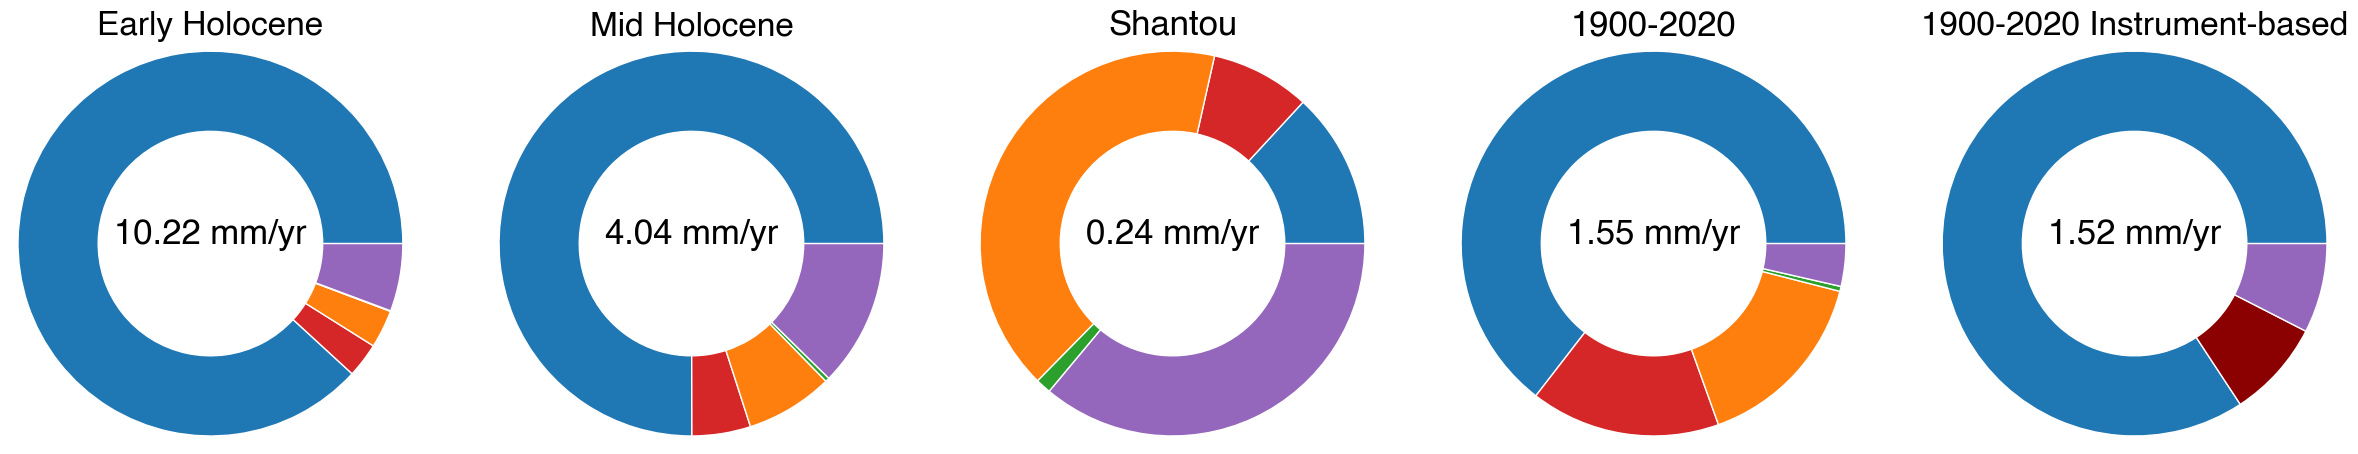

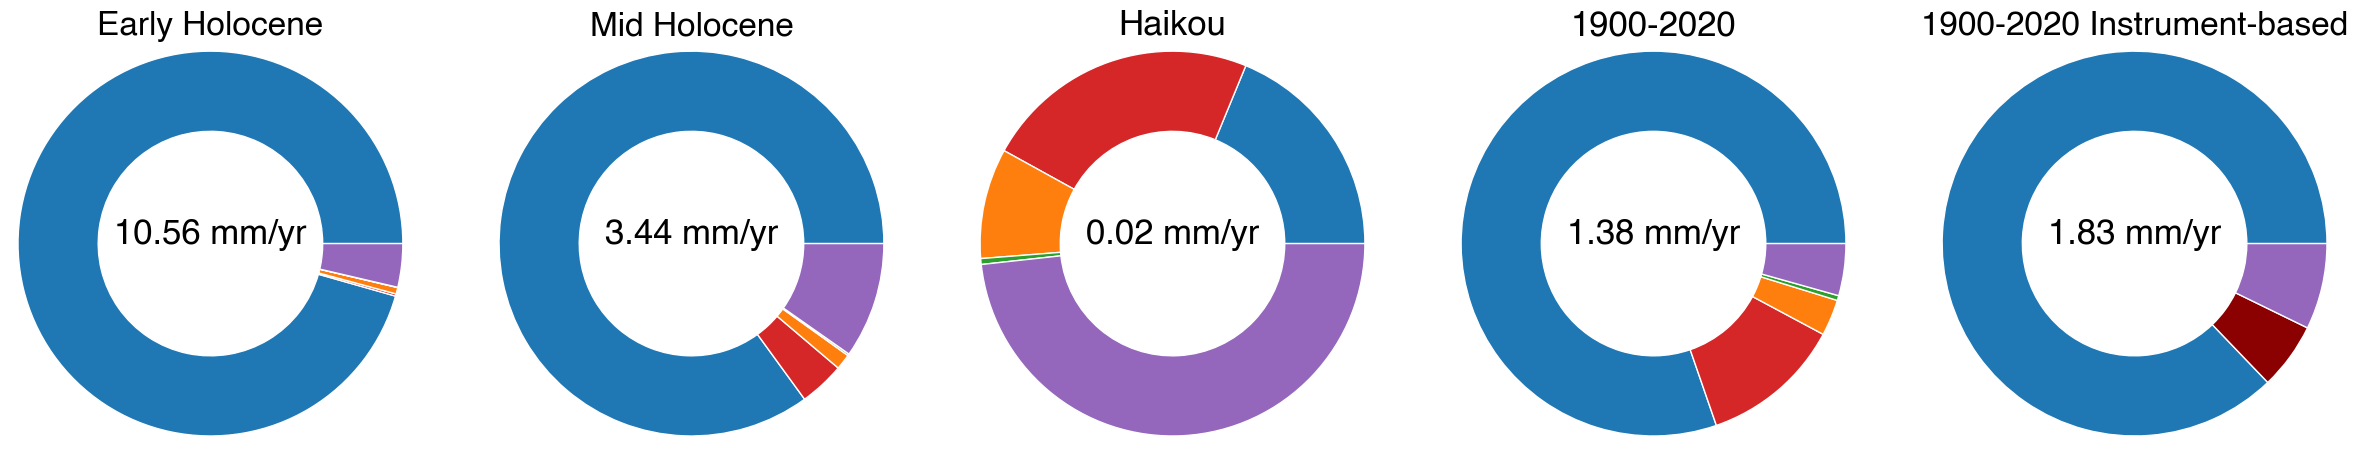

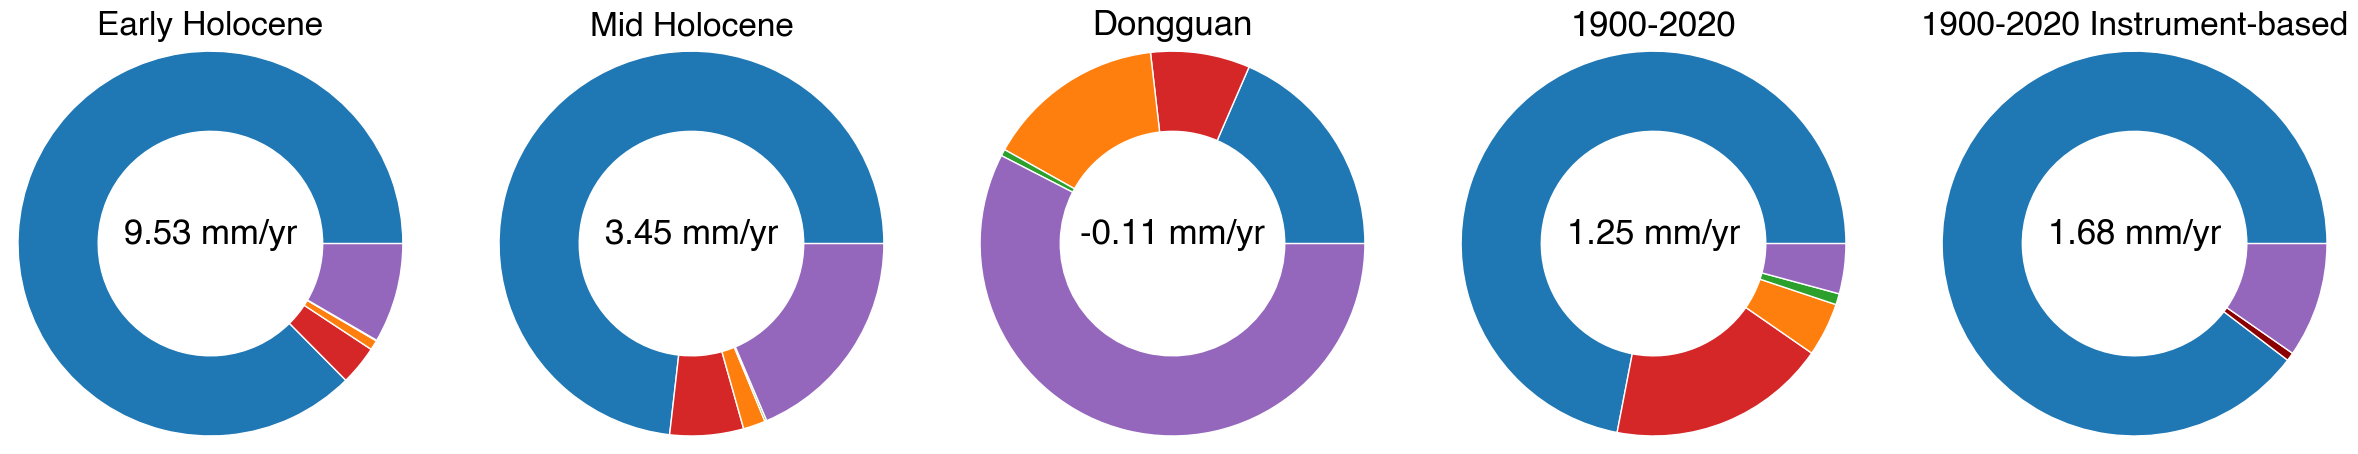

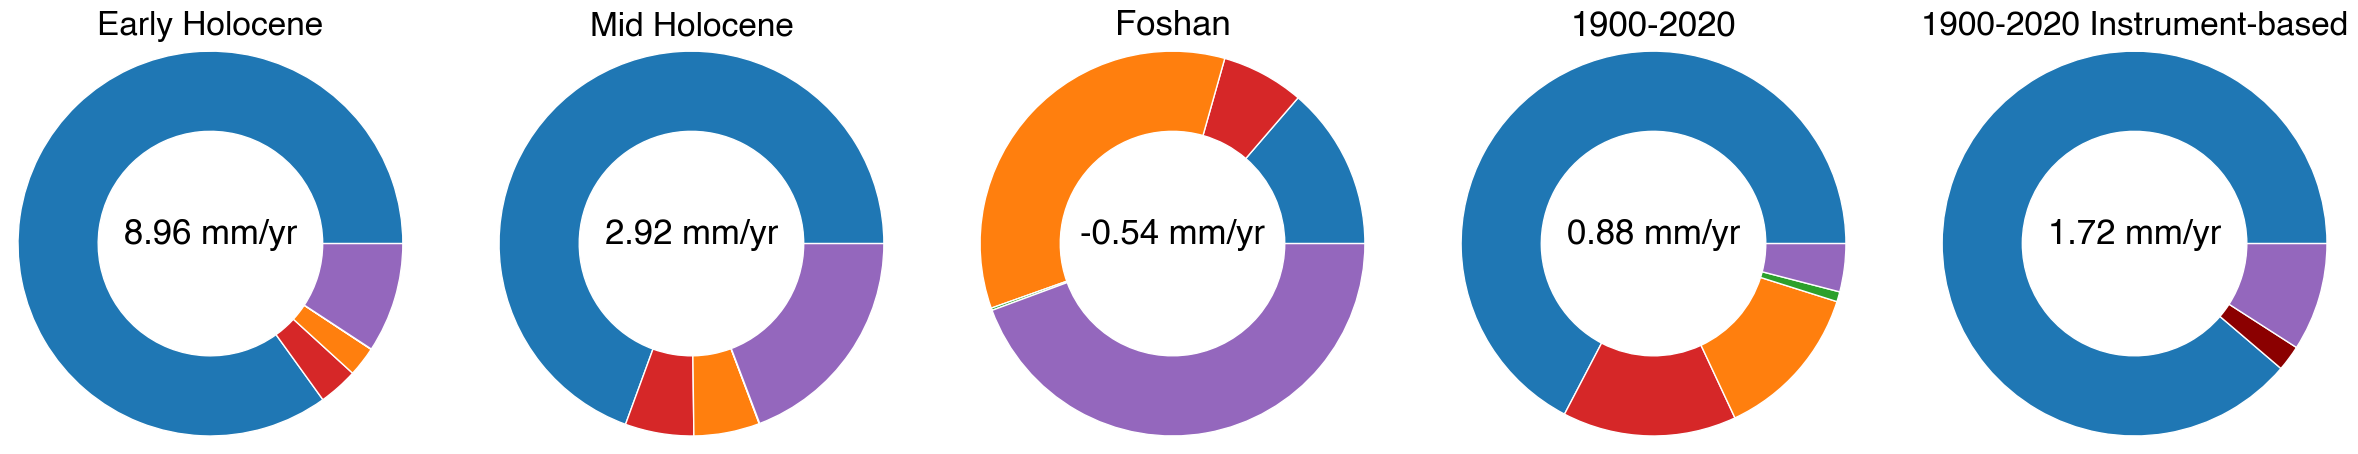

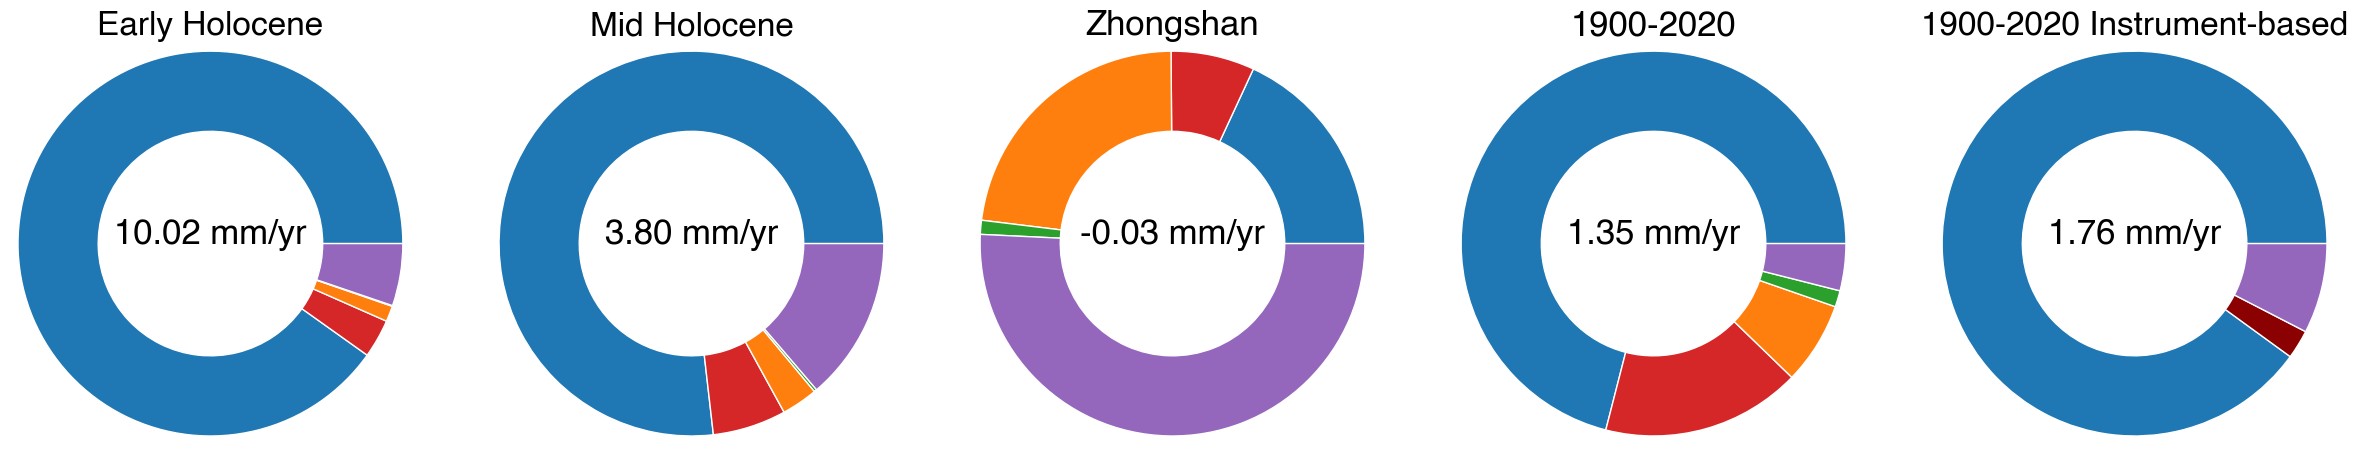

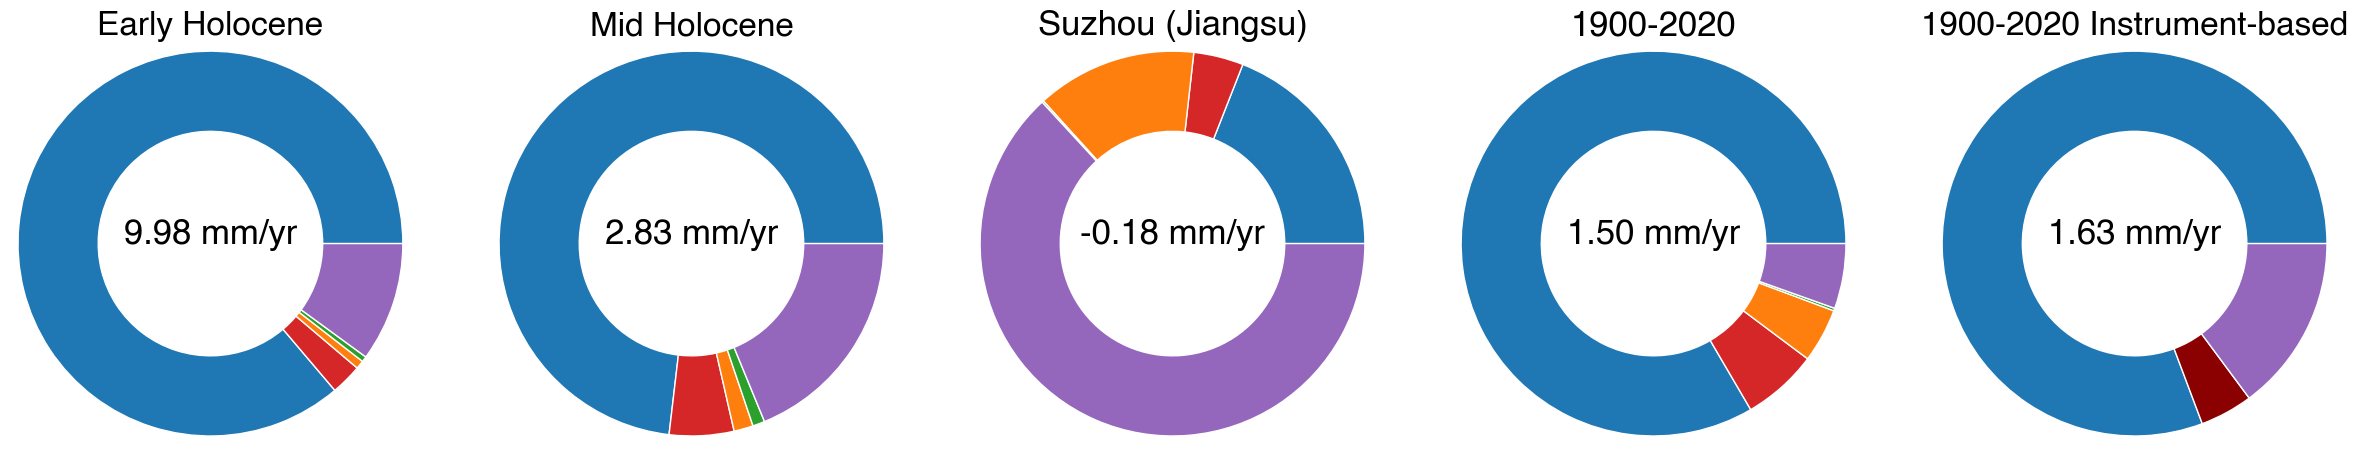

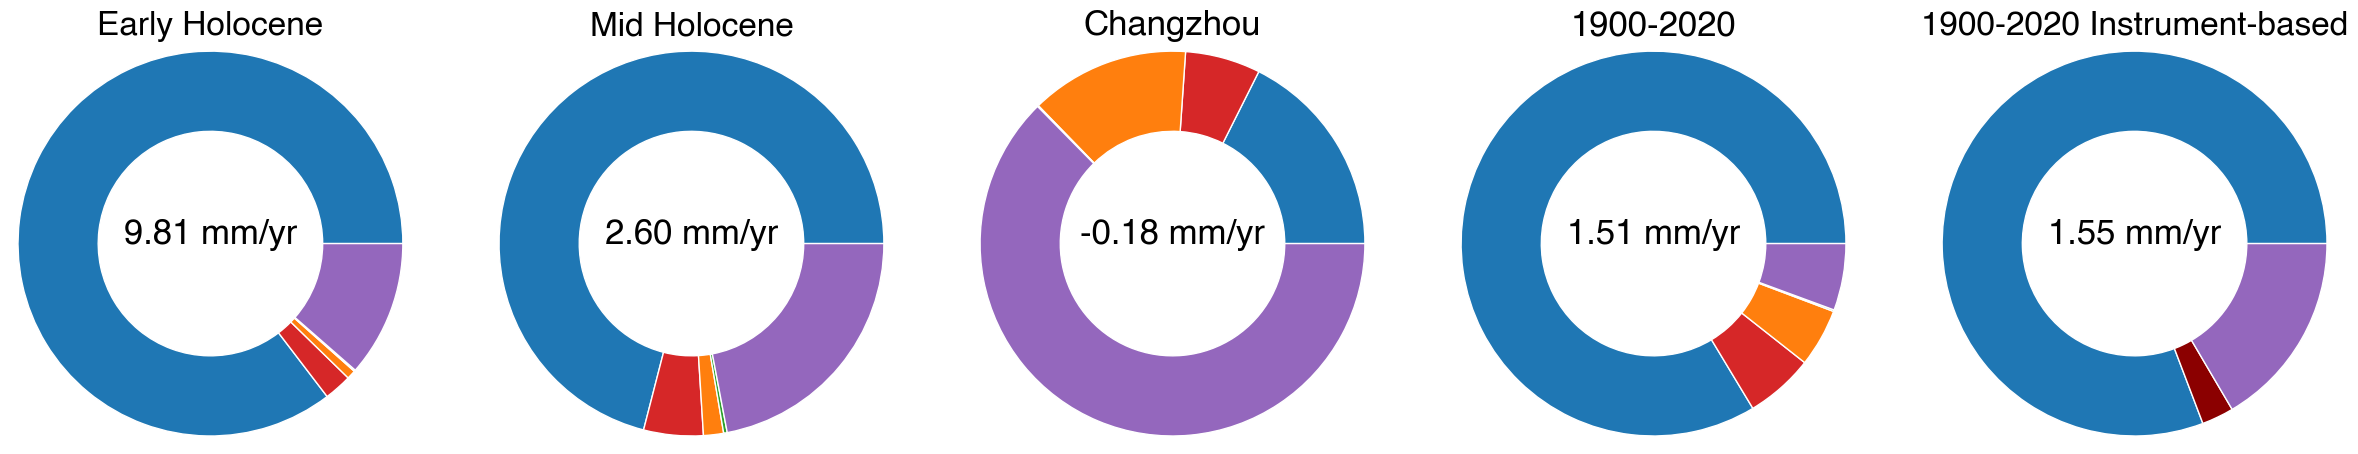

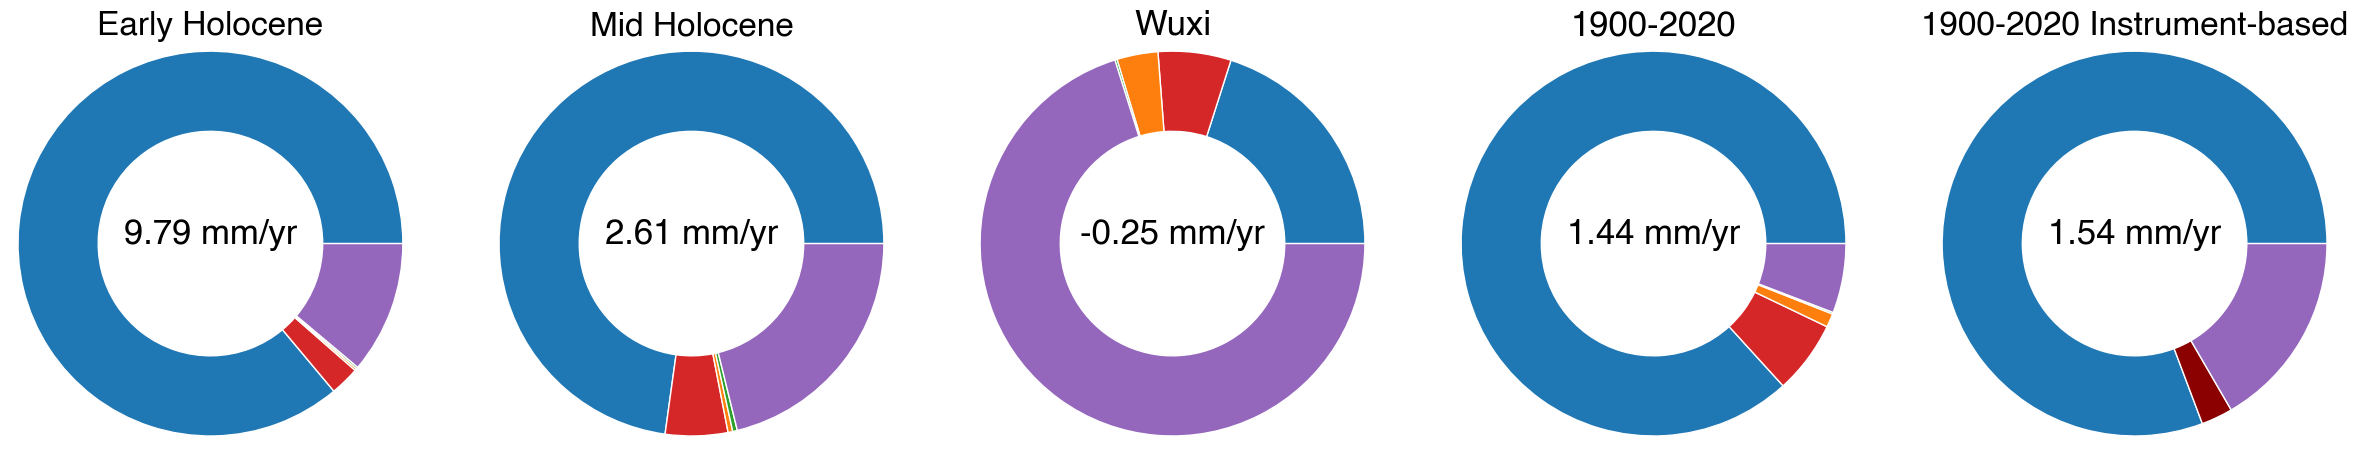

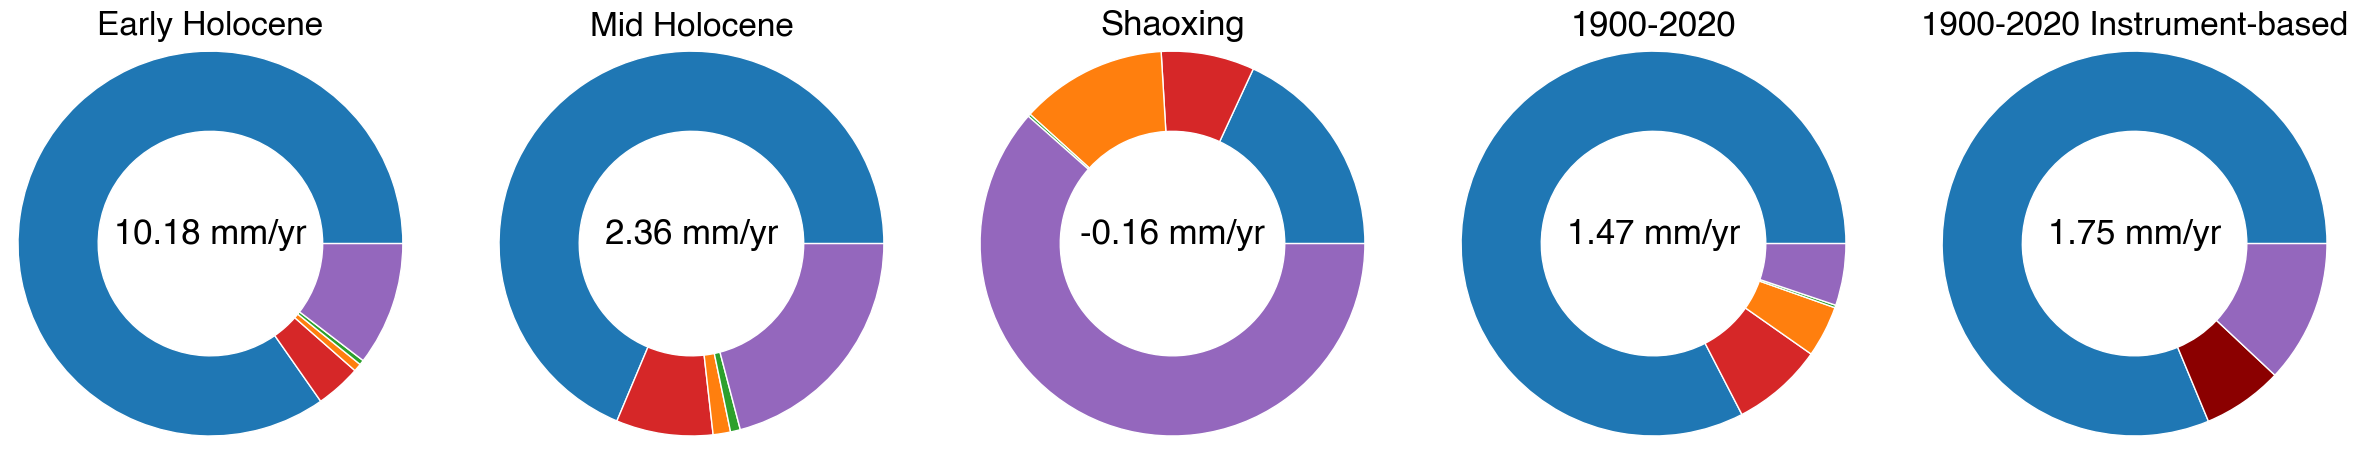

In [18]:
# Load the dataset
ds = xr.open_dataset("../data/city_budget.nc")

# Extract data
cities = ds.city.values  # City names
early_holocene_rates = ds.early_holocene_rate.values
mid_holocene_rates = ds.mid_holocene_rate.values
late_holocene_rates = ds.late_holocene_rate.values
post_1900_rates = ds.post_1900_rate.values
post_1900_rates_2 = ds.post_1900_rate_2.values

early_holocene_pies = ds.early_holocene_pie.values
mid_holocene_pies = ds.mid_holocene_pie.values
late_holocene_pies = ds.late_holocene_pie.values
post_1900_pies = ds.post_1900_pie.values
post_1900_pies_2 = ds.post_1900_pie_2.values

order_index = ds.order_index.values
colors = ['C0', 'C3', 'C1', 'C2', 'C4']  # Same colors as original

# Loop over cities to recreate plots
for city_index in range(len(cities)):
    city_name = cities[city_index]
    
    # Extract data for this city
    early_holocene_rate = early_holocene_rates[city_index]
    mid_holocene_rate = mid_holocene_rates[city_index]
    late_holocene_rate = late_holocene_rates[city_index]
    post_1900_rate = post_1900_rates[city_index]
    post_1900_rate_2 = post_1900_rates_2[city_index]
    
    early_holocene_pie = early_holocene_pies[city_index]
    mid_holocene_pie = mid_holocene_pies[city_index]
    late_holocene_pie = late_holocene_pies[city_index]
    post_1900_pie = post_1900_pies[city_index]
    post_1900_pie_2 = post_1900_pies_2[city_index]

    # Create the plot
    plt.figure(figsize=(30, 12))

    # Subplot 151: Early Holocene
    plt.subplot(151)
    mypie2, _ = plt.pie(early_holocene_pie, radius=1.2, labeldistance=0.7, colors=colors, pctdistance=10)
    plt.setp(mypie2, width=0.5, edgecolor='white')
    plt.margins(0, 0)
    plt.text(0, 0, '{:4.2f} mm/yr'.format(early_holocene_rate), fontsize=25, ha='center')
    plt.title('Early Holocene')
    # Subplot 152: Mid Holocene
    plt.subplot(152)
    mypie2, _ = plt.pie(mid_holocene_pie, radius=1.2, labeldistance=0.7, colors=colors, pctdistance=10)
    plt.setp(mypie2, width=0.5, edgecolor='white')
    plt.margins(0, 0)
    plt.text(0, 0, '{:4.2f} mm/yr'.format(mid_holocene_rate), fontsize=25, ha='center')
    plt.title('Mid Holocene')

    # Subplot 153: Late Holocene
    plt.subplot(153)
    mypie2, _ = plt.pie(late_holocene_pie, radius=1.2, labeldistance=0.7, colors=colors, pctdistance=10)
    plt.setp(mypie2, width=0.5, edgecolor='white')
    plt.margins(0, 0)
    plt.text(0, 0, '{:4.2f} mm/yr'.format(late_holocene_rate), fontsize=25, ha='center')
    plt.title(city_name, fontsize=25)  # Note: This overwrites '1990-2020', move if intended elsewhere

    # Subplot 154: Post-1900 (all_cities_signal)
    plt.subplot(154)
    mypie2, _ = plt.pie(post_1900_pie, radius=1.2, labeldistance=0.7, pctdistance=10, colors=colors)
    plt.setp(mypie2, width=0.5, edgecolor='white')
    plt.margins(0, 0)
    plt.title('1900-2020', fontsize=25)
    plt.text(0, 0, '{:4.2f} mm/yr'.format(post_1900_rate), fontsize=25, ha='center')
    

    # Subplot 155: Post-1900 (all_cities_signal_2 with order_index)
    plt.subplot(155)
    mypie2, _ = plt.pie(post_1900_pie_2[order_index], radius=1.2, labeldistance=0.7, pctdistance=10, 
                        colors=np.array(['C4', 'C0', 'darkred'])[order_index])
    plt.setp(mypie2, width=0.5, edgecolor='white')
    plt.margins(0, 0)
    plt.text(0, 0, '{:4.2f} mm/yr'.format(post_1900_rate_2), fontsize=25, ha='center')
    plt.title('1900-2020 Instrument-based')

    